In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
x=np.arange(1,21).reshape(-1,1)
y=np.array([10,12,15,18,20,25,30,28,35,40,45,42,50,55,60,70,72,75])

In [ ]:
from sklearn.model_selection import train_test_split
x_sliced = x[:len(y)]
x_train,x_test,y_train,y_test=train_test_split(x_sliced,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_reg=DecisionTreeRegressor(random_state=42)
dt_reg.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

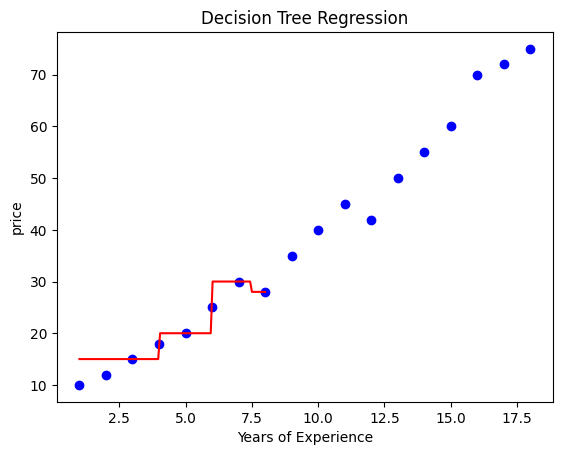

In [ ]:
x_grid=np.linspace(1,8,100).reshape(-1,1)
y_pred=dt_reg.predict(x_grid)
plt.scatter(x_sliced,y,color='blue')
plt.plot(x_grid,y_pred,color='red')
plt.title("Decision Tree Regression")
plt.xlabel("Years of Experience")
plt.ylabel("price")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
y_pred=dt_reg.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("Mean Squared Error:",mse)
print("R2 Score:",r2)


Mean Squared Error: 23.666666666666668
R2 Score: 0.9013089308467508


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42
)
rf_reg.fit(x_train,y_train)


RandomForestRegressor(max_depth=10, random_state=42)

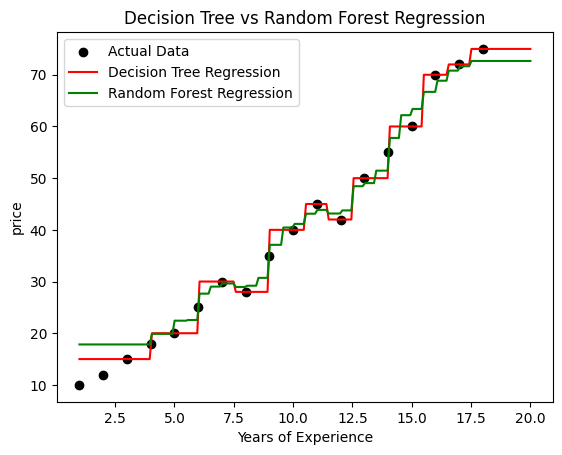

In [ ]:
x_grid=np.linspace(1,20,200).reshape(-1,1)

plt.scatter(x_sliced,y,color='black', label='Actual Data')
plt.plot(x_grid,dt_reg.predict(x_grid),color='red', label='Decision Tree Regression')
plt.plot(x_grid,rf_reg.predict(x_grid),color='green', label='Random Forest Regression')
plt.title("Decision Tree vs Random Forest Regression")
plt.xlabel("Years of Experience")
plt.ylabel("price")
plt.legend()
plt.show()

In [ ]:
rf_pred=rf_reg.predict(x_test)
print("Decision Tree Regression")
y_pred_dt = dt_reg.predict(x_test)
print("Mean Squared Error:",mean_squared_error(y_test,y_pred_dt))
print("R2 Score:",r2_score(y_test,y_pred_dt))

print("\nRandom Forest Regression")
print("Mean Squared Error:",mean_squared_error(y_test,rf_pred))
print("R2 Score:",r2_score(y_test,rf_pred))

Decision Tree Regression
Mean Squared Error: 23.666666666666668
R2 Score: 0.9013089308467508

Random Forest Regression
Mean Squared Error: 22.04781666666666
R2 Score: 0.908059608479092


**Dataset Name: House Price Prediction Dataset**
https://drive.google.com/file/d/1aNw7f2sO16PlhqxdOeFBqwWDjjE1XrhT/view?usp=sharing

Business Scenario

* A real estate analytics company helps customers estimate the market value of residential properties.
*   Property prices do not always increase smoothly:

*  Prices jump based on location
*   Amenities create sudden price differences
Market behaviour is noisy and inconsistent
The company wants a reliable pricing system that can:

* Handle non-linear relationships
Work well with noisy real-world data
Provide stable predictions for unseen properties  
*   You are hired as a Data Analyst to build this pricing solution.


* Load the dataset and examine the available property attributes.  
* Identify input features that may influence house prices (e.g., size, bedrooms, bathrooms, location-related fields).  


* Build a regression model that predicts house price based on the selected features.  
* Train the model using historical property data.Predict prices for unseen property records.
Evaluate the model performance using:  

Mean Squared Error (MSE)
R² score
house_data.csv - Google Drive

6. Analyze the prediction behavior
7. Build an alternative regression model that combines predictions from multiple rule-based models.
8. Compare the two models based on:
Does the model produce smooth or step-wise predictions?
Does it react strongly to small changes in input?
Stability of predictions
Sensitivity to noise
Performance on test data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Datasets/house_data.csv')
df.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [ ]:
df.dtypes

,0
date,object
price,float64
bedrooms,float64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,int64
view,int64
condition,int64


In [ ]:
df.isnull().sum()

,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


In [ ]:
X = df.drop(columns=['price','date','street','city','statezip','country'])
y = df['price']

X.head()


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


In [ ]:
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_r2 = r2_score(y_test, y_pred_dt)

print("Decision Tree MSE:", dt_mse)
print("Decision Tree R²:", dt_r2)


Decision Tree MSE: 1052121827350.4335
Decision Tree R²: -0.03164740215739448


In [ ]:
rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)


RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
y_pred_rf = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print("Random Forest MSE:", rf_mse)
print("Random Forest R²:", rf_r2)


Random Forest MSE: 991775851992.8134
Random Forest R²: 0.027524232809177818


In [ ]:
sample = X_test.iloc[:5]
rf.predict(sample)


array([ 412349.07666667,  350639.82550324, 1132995.54      ,
        509775.55107142,  317385.75238096])

In [ ]:
comparison = pd.DataFrame({
    "Actual Price": y_test.iloc[:5].values,
    "DT Prediction": y_pred_dt[:5],
    "RF Prediction": y_pred_rf[:5]
})

comparison


,Actual Price,DT Prediction,RF Prediction
0,544000.0,3.370000e+05,4.123491e+05
1,0.0,3.120000e+05,3.506398e+05
2,1712500.0,1.411600e+06,1.132996e+06
3,365000.0,2.372279e+05,5.097756e+05
4,275000.0,2.610000e+05,3.173858e+05


In [ ]:
print("Decision Tree: Step-wise, high variance, overfits")
print("Random Forest: Smooth, stable, noise resistant")
print("Random Forest Regressor is best suited for real estate price prediction")


Decision Tree: Step-wise, high variance, overfits
Random Forest: Smooth, stable, noise resistant
Random Forest Regressor is best suited for real estate price prediction
